In [1]:
import spacy
spacy_nlp = spacy.load("en_core_web_sm")
from spacy.lang.en.stop_words import STOP_WORDS
import utility_functions as utils
import importlib
import pandas as pd
from transformers import pipeline, DistilBertTokenizer

importlib.reload(utils)

custom_stop_words = list(STOP_WORDS)  # Existing stop words
custom_stop_words.extend(["ll", "ve", "'em", "em", "ho", "fo", "ah", "de"])  # Tokens which doesn't really make sense to have them.

# Topic Model 0 - Street
# Topic Model 1 - Violence

/Users/borosabel/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_pickle('/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Excel/df_w_emotion.pkl')

In [4]:
# df['Lyrics'] = df['Lyrics'].apply(utils.cleanup)

In [3]:
tokenizer = DistilBertTokenizer.from_pretrained('bhadresh-savani/distilbert-base-uncased-emotion')
classifier = pipeline("text-classification", model='bhadresh-savani/distilbert-base-uncased-emotion', top_k=None)

def get_sentiment(text):
    max_length = 500
    tokens = tokenizer.tokenize(text)
    chunks = [tokens[i:i + max_length] for i in range(0, len(tokens), max_length)]

    all_scores = []

    for chunk in chunks:
        chunk_text = tokenizer.convert_tokens_to_string(chunk)
        results = classifier(chunk_text)
        
        for result in results:
            all_scores.append({emotion['label']: emotion['score'] for emotion in result})

    # Aggregate scores
    aggregated_scores = {}
    for score_dict in all_scores:
        for emotion, score in score_dict.items():
            if emotion in aggregated_scores:
                aggregated_scores[emotion] += score
            else:
                aggregated_scores[emotion] = score

    # Average the scores
    num_entries = len(all_scores)
    aggregated_scores = {emotion: score / num_entries for emotion, score in aggregated_scores.items()}

    return aggregated_scores

In [6]:
from tqdm.auto import tqdm

tqdm.pandas(desc="Extracting entities")
df['Emotion Scores'] = df['Lyrics'].progress_apply(get_sentiment)

Extracting entities:   0%|          | 0/1360 [00:00<?, ?it/s]

In [8]:
emotion_df = df['Emotion Scores'].apply(pd.Series)
df = pd.concat([df, emotion_df], axis=1).drop('Emotion Scores', axis=1)
emotion_columns = emotion_df.columns.tolist()

In [4]:
df

,Artist,Album,Song,Coast,Release Year,Tempo1,Tempo2,Duration (s),Sample Rate (Hz),Path,Lyrics,Topic Model,Named_Entities,Topic Model Index,joy,anger,sadness,fear,love,surprise
0,Big L,Lifestylez Ov Da Poor and Dangerous,8 Iz Enuff.mp3,east_coast,1995,96.774194,48.000000,298.840000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,yeah my crew be in the house terra herb mcgruf...,"['nigga', 'shit', 'ride', 'dick', 'bitch', 'di...","[{'entity': 'Terra', 'type': 'PER', 'score': 0...",1,0.391312,0.322842,0.031455,0.240503,0.006392,0.007497
1,Big L,Lifestylez Ov Da Poor and Dangerous,Da Graveyard.mp3,east_coast,1995,93.750000,46.511628,323.760000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,it be the number one crew in the area big l be...,"['nigga', 'shit', 'ride', 'dick', 'bitch', 'di...","[{'entity': 'Big', 'type': 'PER', 'score': 0.5...",1,0.589780,0.064791,0.007301,0.007067,0.328468,0.002593
2,Big L,Lifestylez Ov Da Poor and Dangerous,I Don't Understand It.mp3,east_coast,1995,93.750000,47.244094,260.226667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,there be too many mc 's who be overrate yeah a...,"['rhyme', 'cuz', 'soul', 'rhythm', 'stage', 'l...","[{'entity': 'L', 'type': 'PER', 'score': 0.571...",0,0.118868,0.243809,0.593209,0.038575,0.003464,0.002075
3,Big L,Lifestylez Ov Da Poor and Dangerous,"No Endz, No Skinz.mp3",east_coast,1995,100.000000,50.420168,208.733333,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,let I get to the point real quick when yeah po...,"['rhyme', 'cuz', 'soul', 'rhythm', 'stage', 'l...","[{'entity': 'Benz', 'type': 'MISC', 'score': 0...",0,0.994099,0.002589,0.001196,0.000524,0.000969,0.000623
4,Big L,Lifestylez Ov Da Poor and Dangerous,MVP.mp3,east_coast,1995,86.956522,43.478261,218.866667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,a yeah spark up the phillie and pass the stout...,"['rhyme', 'cuz', 'soul', 'rhythm', 'stage', 'l...","[{'entity': 'L', 'type': 'PER', 'score': 0.444...",0,0.164897,0.818634,0.005583,0.004752,0.003524,0.002610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,Dr.Dre,The Chronic,Dr. Dre - The Day the Niggaz Took Over (feat. ...,west_coast,1992,93.750000,46.875000,273.206000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,yeah nigga what be up with all that motherfuck...,"['nigga', 'shit', 'ride', 'dick', 'bitch', 'di...","[{'entity': 'Lucifer', 'type': 'PER', 'score':...",1,0.306460,0.661105,0.022412,0.005062,0.003681,0.001280
1356,Dr.Dre,The Chronic,"Dr. Dre - Bitches Ain't Shit (feat. Jewell, Sn...",west_coast,1992,92.307692,46.153846,287.207625,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,— so all of yeah african all of yeah african t...,"['nigga', 'shit', 'ride', 'dick', 'bitch', 'di...","[{'entity': 'Africans', 'type': 'MISC', 'score...",1,0.638882,0.312282,0.033750,0.009971,0.003279,0.001837
1357,Dr.Dre,The Chronic,Dr. Dre - Stranded On Death Row (feat. Bushwic...,west_coast,1992,90.909091,45.801527,287.335333,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,yeah really do not understand do yeah hey man ...,"['nigga', 'shit', 'ride', 'dick', 'bitch', 'di...","[{'entity': 'Death Row', 'type': 'ORG', 'score...",1,0.121620,0.648577,0.018858,0.203552,0.003240,0.004152
1358,Dr.Dre,The Chronic,Dr. Dre - Nuthin' but a ＂G＂ Thang (feat. Snoop...,west_coast,1992,95.238095,47.244094,238.677917,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,yeah yeah what be up yeah man give I some of t...,"['nigga', 'shit', 'ride', 'dick', 'bitch', 'di...","[{'entity': 'RBX', 'type': 'ORG', 'score': 0.7...",1,0.220978,0.716446,0.041098,0.014734,0.004774,0.001970


In [10]:
# df.to_pickle('df_w_emotion.pkl')

In [6]:
# Calculating average emotion scores by coast
average_emotions = df.groupby('Coast')[['joy', 'anger', 'sadness', 'fear', 'love', 'surprise']].mean().reset_index()

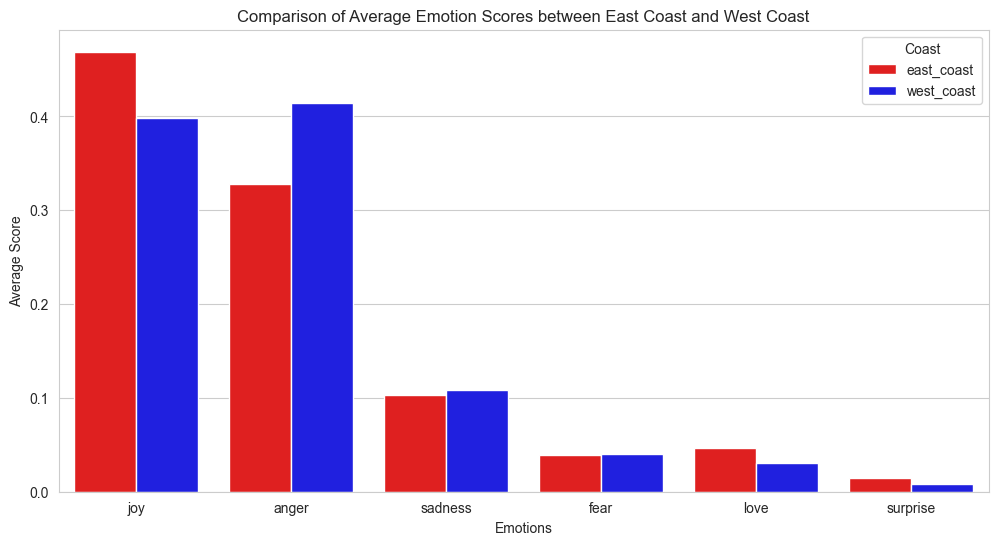

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting
sns.barplot(data=average_emotions.melt(id_vars=['Coast']), x='variable', y='value', hue='Coast', palette={"east_coast": "red", "west_coast": "blue"})
plt.title('Comparison of Average Emotion Scores between East Coast and West Coast')
plt.xlabel('Emotions')
plt.ylabel('Average Score')
plt.legend(title='Coast')
plt.savefig('avg_emotions_per_coast.png')
plt.show()

In [19]:
df_w_topics_0 = df[df['Topic Model Index'] == 0]
df_w_topics_1 = df[df['Topic Model Index'] == 1]

In [20]:
# Calculating average emotion scores by coast
average_emotions_0 = df_w_topics_0.groupby('Coast')[['joy', 'anger', 'sadness', 'fear', 'love', 'surprise']].mean().reset_index()
average_emotions_1 = df_w_topics_1.groupby('Coast')[['joy', 'anger', 'sadness', 'fear', 'love', 'surprise']].mean().reset_index()

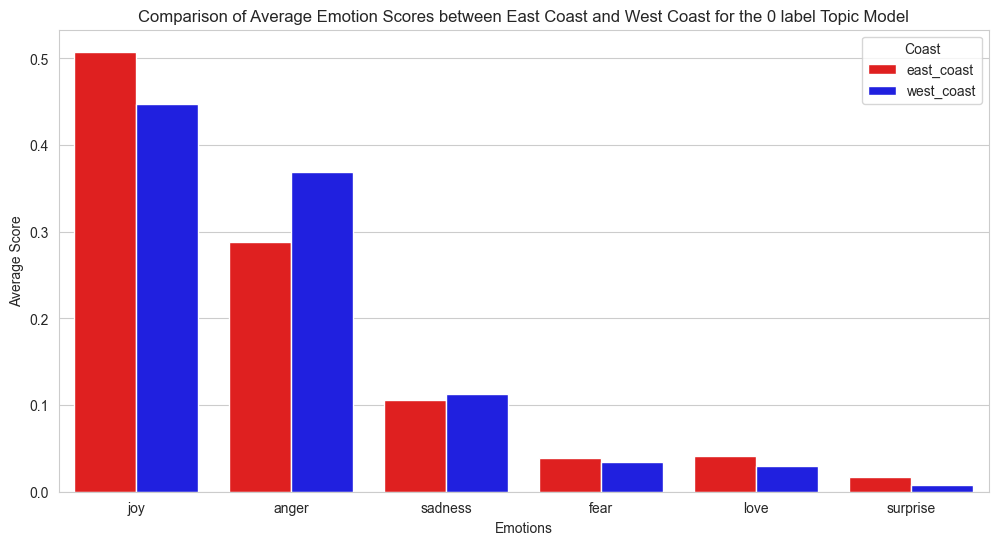

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting
sns.barplot(data=average_emotions_0.melt(id_vars=['Coast']), x='variable', y='value', hue='Coast', palette={"east_coast": "red", "west_coast": "blue"})
plt.title('Comparison of Average Emotion Scores between East Coast and West Coast for the 0 label Topic Model')
plt.xlabel('Emotions')
plt.ylabel('Average Score')
plt.legend(title='Coast')

plt.show()

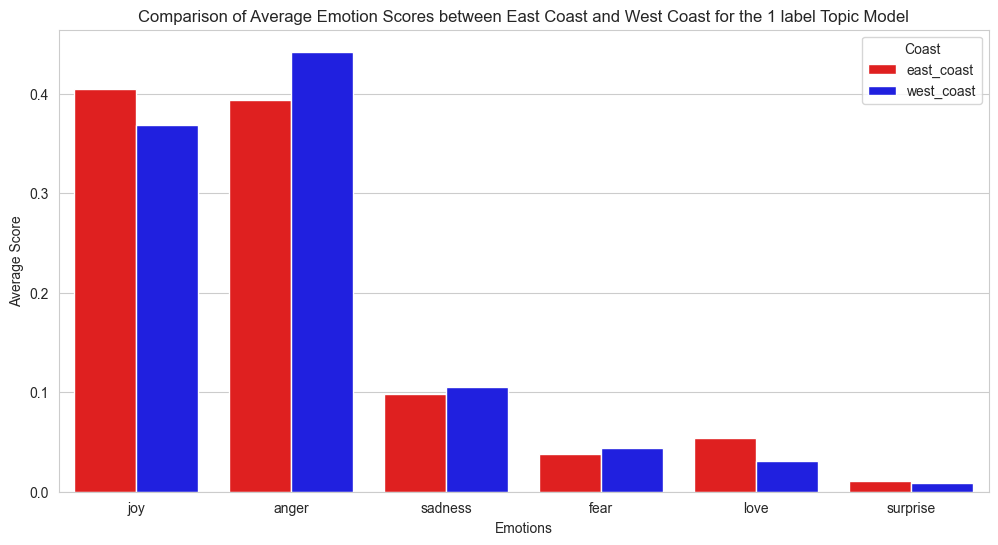

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting
sns.barplot(data=average_emotions_1.melt(id_vars=['Coast']), x='variable', y='value', hue='Coast', palette={"east_coast": "red", "west_coast": "blue"})
plt.title('Comparison of Average Emotion Scores between East Coast and West Coast for the 1 label Topic Model')
plt.xlabel('Emotions')
plt.ylabel('Average Score')
plt.legend(title='Coast')

plt.show()

In [165]:
# Coherent multimodal analysis

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [192]:
emotion_data = df[emotion_columns]

/Users/borosabel/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/borosabel/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


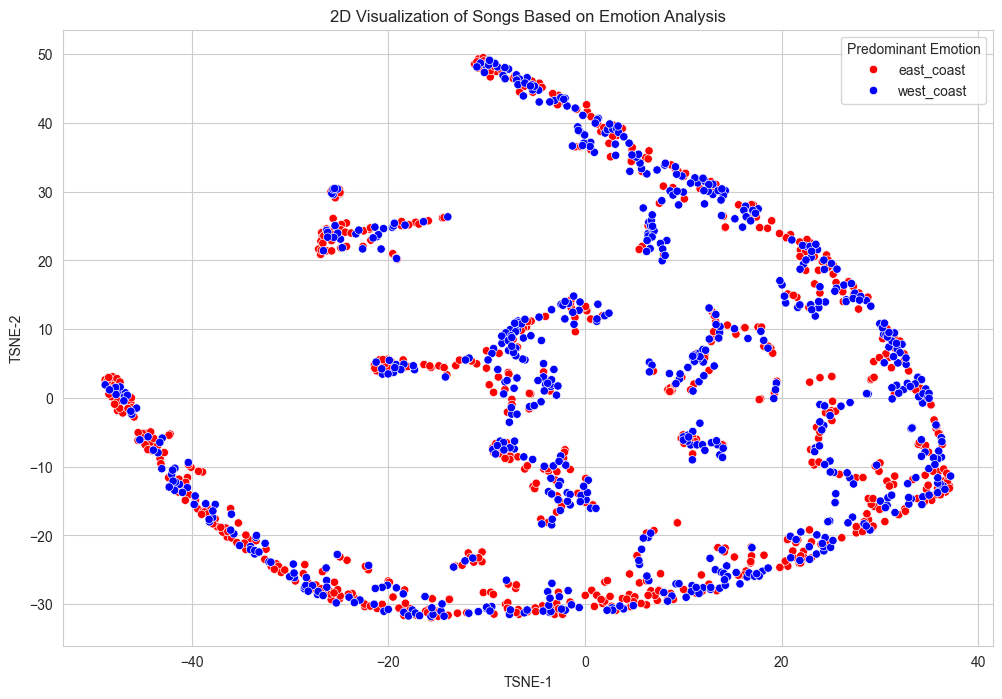

In [198]:
# Apply PCA
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(emotion_data.values)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])

# Determine the predominant emotion for coloring
df['predominant_emotion'] = emotion_df.idxmax(axis=1)

# Plotting
plt.figure(figsize=(12, 8))
# sns.scatterplot(x='t-SNE1', y='t-SNE2', hue=df['predominant_emotion'], data=tsne_df)
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue=df['Coast'], data=tsne_df, palette={'east_coast': 'red', 'west_coast': 'blue'})
plt.title('2D Visualization of Songs Based on Emotion Analysis')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.legend(title='Predominant Emotion')
plt.show()

In [185]:
df_0 = df[df['Topic Model Index'] == 0].reset_index(drop=True)

In [186]:
emotion_data = df_0[emotion_columns]

/Users/borosabel/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/borosabel/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


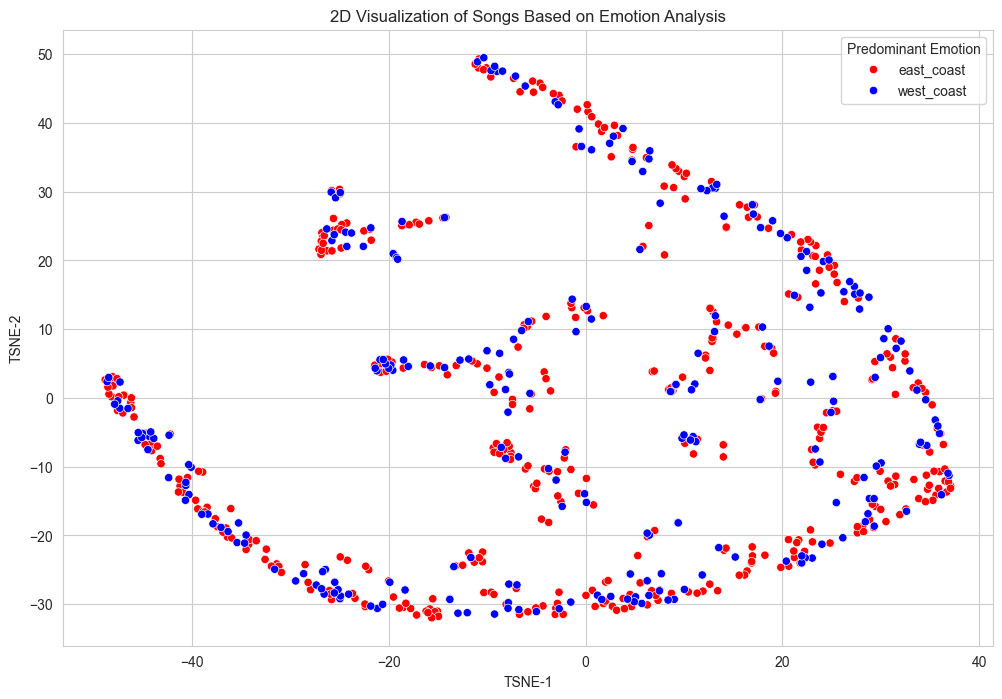

In [199]:
# Apply PCA
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(emotion_data.values)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])

# Determine the predominant emotion for coloring
df['predominant_emotion'] = emotion_df.idxmax(axis=1)

# Plotting
plt.figure(figsize=(12, 8))
# sns.scatterplot(x='t-SNE1', y='t-SNE2', hue=df['predominant_emotion'], data=tsne_df)
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue=df_0['Coast'], data=tsne_df, palette={'east_coast': 'red', 'west_coast': 'blue'})
plt.title('2D Visualization of Songs Based on Emotion Analysis')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.legend(title='Predominant Emotion')
plt.show()

In [200]:
df_1 = df[df['Topic Model Index'] == 1].reset_index(drop=True)

In [201]:
emotion_data = df_1[emotion_columns]

/Users/borosabel/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/borosabel/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


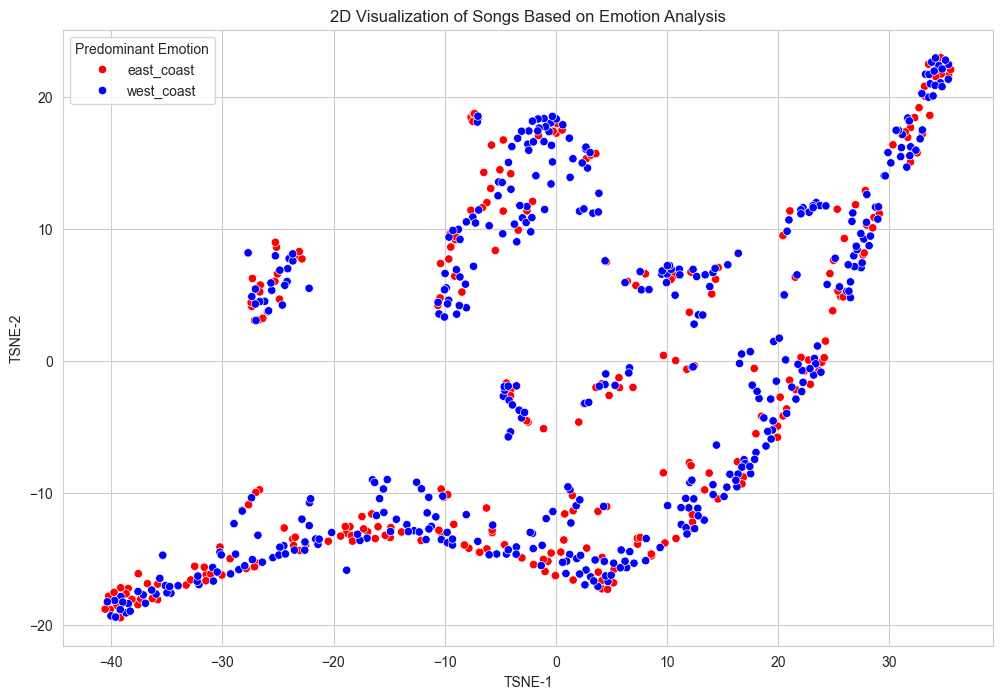

In [202]:
# Apply PCA
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(emotion_data.values)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])

# Determine the predominant emotion for coloring
df['predominant_emotion'] = emotion_df.idxmax(axis=1)

# Plotting
plt.figure(figsize=(12, 8))
# sns.scatterplot(x='t-SNE1', y='t-SNE2', hue=df['predominant_emotion'], data=tsne_df)
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue=df_1['Coast'], data=tsne_df, palette={'east_coast': 'red', 'west_coast': 'blue'})
plt.title('2D Visualization of Songs Based on Emotion Analysis')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.legend(title='Predominant Emotion')
plt.show()